<a href="https://colab.research.google.com/github/Chaitanyasuma/PipelineDP/blob/main/PipelineDP_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

# Generate synthetic data for the first dataset (ID, name, age)
num_records = 30
np.random.seed(0)
ids = np.arange(1, num_records + 1)
names = ['Name_' + str(i) for i in ids]
ages = np.random.randint(20, 60, size=num_records)

df1 = pd.DataFrame({'ID': ids, 'Name': names, 'Age': ages})

# Generate synthetic data for the second dataset (ID, salary)
# Select a subset of IDs from the first dataset to create the second dataset
subset_ids = np.random.choice(ids, size=num_records//2, replace=False)
salaries = np.random.randint(30000, 100000, size=len(subset_ids))

df2 = pd.DataFrame({'ID': subset_ids, 'Salary': salaries})

# Save the datasets as CSV files
df1.to_csv('dataset1.csv', index=False)
df2.to_csv('dataset2.csv', index=False)

# Display the paths of the saved CSV files
print("First dataset saved as 'dataset1.csv'")
print("Second dataset saved as 'dataset2.csv'")


First dataset saved as 'dataset1.csv'
Second dataset saved as 'dataset2.csv'


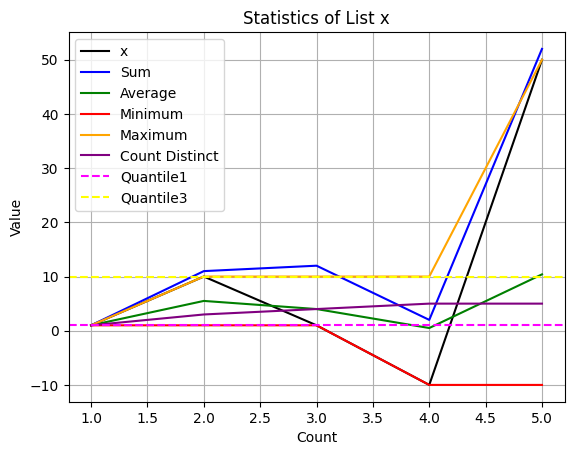

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Given list
x = [1, 10, 1, -10, 50]

# Calculate statistics
sum_x = np.cumsum(x)
avg_x = np.array(sum_x) / np.arange(1, len(x) + 1)
count_x = np.arange(1, len(x) + 1)
min_x = np.minimum.accumulate(x)
max_x = np.maximum.accumulate(x)

# Calculate cumulative count of distinct elements
unique_elements, counts = np.unique(x, return_counts=True)
count_distinct_x = np.cumsum(counts)

# Repeat the last count value to match the length of other arrays
while len(count_distinct_x) < len(count_x):
    count_distinct_x = np.append(count_distinct_x, count_distinct_x[-1])

# Calculate variance, quantile1, and quantile3
# variance_x = np.var(x)
quantile1_x = np.percentile(x, 25)
quantile3_x = np.percentile(x, 75)

# Plot
plt.plot(count_x, x, label='x', color='black', linestyle='-')
plt.plot(count_x, sum_x, label='Sum', color='blue', linestyle='-')
plt.plot(count_x, avg_x, label='Average', color='green', linestyle='-')
plt.plot(count_x, min_x, label='Minimum', color='red', linestyle='-')
plt.plot(count_x, max_x, label='Maximum', color='orange', linestyle='-')
plt.plot(count_x, count_distinct_x, label='Count Distinct', color='purple', linestyle='-')


# Plot quantile1 as horizontal line
plt.axhline(y=quantile1_x, color='magenta', linestyle='--', label='Quantile1')
# Plot quantile3 as horizontal line
plt.axhline(y=quantile3_x, color='yellow', linestyle='--', label='Quantile3')

# Add labels and legend
plt.xlabel('Count')
plt.ylabel('Value')
plt.title('Statistics of List x')
plt.legend()

# Show plot
plt.grid(True)
plt.show()


### Assume 2 databases D1 and D2 which contain sensitive and non-sensitive data

In [ ]:
# Install required libraries
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488493 sha256=608df6709b4ebdf63c9653fa89edc193be7c02e12ff23a1b2e3c8697700a05c8
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [ ]:
pip install pipeline-dp pyspark absl-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.6/77.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 17.0 MB/s eta 0:00:00


In [ ]:
pip install common_utils

In [ ]:
from absl import app
from absl import flags
import pyspark
import pipeline_dp
from pipeline_dp.private_spark import make_private
from pipeline_dp import SumParams


In [ ]:
# Import SparkSession
from pyspark.sql import SparkSession

# Create SparkSession
spark = SparkSession.builder \
    .appName("SparkSQLExample") \
    .getOrCreate()

In [ ]:
# Load data into DataFrame
df_names_and_ages = spark.read.csv("dataset1.csv", header=True, inferSchema=True)

df_salaries = spark.read.csv("dataset2.csv", header=True, inferSchema=True)

In [ ]:
df_names_and_ages.head()

Row(ID=1, Name='Name_1', Age=20)

In [ ]:
df_salaries.head()

Row(ID=16, Salary=76522)

In [ ]:
# define pipelineDP epsilon
backend = pipeline_dp.LocalBackend()
budget_accountant = pipeline_dp.NaiveBudgetAccountant(total_epsilon=1,
                                                          total_delta=1e-6)

# Create DPEngine which will execute the logic.
dp_engine = pipeline_dp.DPEngine(budget_accountant, backend)

In [ ]:
# Import necessary functions from pyspark.sql
from pyspark.sql import functions as F

# Calculate non-private statistics
non_private_sum = df_salaries.select(F.sum('salary')).collect()[0][0]
non_private_count = df_salaries.select(F.count('salary')).collect()[0][0]
non_private_min = df_salaries.select(F.min('salary')).collect()[0][0]
non_private_max = df_salaries.select(F.max('salary')).collect()[0][0]
non_private_avg = df_salaries.select(F.avg('salary')).collect()[0][0]

# Print the results
print("Non-private Sum:", non_private_sum)
print("Non-private Count:", non_private_count)
print("Non-private Min:", non_private_min)
print("Non-private Max:", non_private_max)
print("Non-private Avg:", non_private_avg)


Non-private Sum: 932450
Non-private Count: 15
Non-private Min: 34420
Non-private Max: 93360
Non-private Avg: 62163.333333333336


In [ ]:
import numpy as np

# Extract salaries column as NumPy array
salaries = np.array(df_salaries.select('salary').rdd.map(lambda row: row.salary).collect())

# Define privacy parameters
epsilon = 1.0  # Example value, adjust as needed
delta = 1e-5   # Example value, adjust as needed

# Define privacy ID, partition key and aggregated value extractors.
# The aggregated value extractor isn't used in this example.
data_extractors = pipeline_dp.DataExtractors(
   partition_extractor=lambda row: row.day,
   privacy_id_extractor=lambda row: row.user_id,
   value_extractor=lambda row: 1)

# Configure the aggregation parameters.
params = pipeline_dp.AggregateParams(
   noise_kind=pipeline_dp.NoiseKind.LAPLACE,
   # This example computes only count but we can compute multiple
   # ... metrics at once.
   metrics=[pipeline_dp.Metrics.COUNT],
   # Limits visits contributed by a visitor. A visitor can contribute to
   # ... up to 3 days
   max_partitions_contributed=3,
   # ... and up to 2 visits per day.
   max_contributions_per_partition=2)
# Configure the output partition keys as they are publicly known.
# The output should include all week days.
public_partitions=list(range(1, 8))

dp_result_sum = df_salaries.sum(
        SumParams(
            # Limits to how much one user can contribute:
            # .. at most 1 salary per user
            max_partitions_contributed=1, # it's like the user is defining the sensitivity????
            # .. at most one rating for each movie
            # max_contributions_per_partition=1,
            # .. with minimal rating of "1"
            min_value=0,
            # .. and maximum rating of "5"
            # max_value=5,
            # The aggregation key: we're grouping by movies
            # partition_extractor=lambda mv: mv.movie_id,
            # The value we're aggregating: we're summing up ratings
            value_extractor=lambda sal: sal.Salary),
        out_explain_computaton_report=explain_computation_report)

budget_accountant.compute_budgets()

# Generate the Explain Computation Report. It must be called after
# budget_accountant.compute_budgets().
print(explain_computation_report.text())


# Print the private results
print("Private Sum:", dp_result_sum)
# print("Private Count:", private_count)
# print("Private Min:", private_min)
# print("Private Max:", private_max)
# print("Private Avg:", private_avg)

AttributeError: 'DataFrame' object has no attribute 'sum'